In [77]:
import pandas as pd
import warnings

# 불필요한 경고 출력을 방지합니다.
warnings.filterwarnings('ignore')

In [79]:
dataframe = pd.read_excel("C:/kovo/player_data_merge.xlsx")
dataframe.head()

,player_name,player_number,player_position,player_img,player_birth,player_height,player_weight,player_school,player_history,구단,경기수,세트수,득점,공격 성공률,서브 성공률,세트 성공률,블로킹 성공률,공격 효율,리시브 효율,디그 성공률
0,허수봉,NO.7,OPPOSITE SPIKER,https://www.kovo.co.kr//upfiles/player/0001873...,1998년 04월 07일,195cm,75kg,호연초-경북사대부중-경북사대부고,2016-2017 V리그 대한항공드래프트1라운드 3순위 (2016.10.26)\n...,현대캐피탈,36,140,602,0.528431,0.056112,0.234694,0.162791,0.323529,0.288265,0.688312
1,김명관,NO.3,SETTER,https://www.kovo.co.kr//upfiles/player/0002233...,1997년 07월 08일,195cm,77kg,동인초-각리중-순천제일고-경기대,2019-2020 V리그 한국전력드래프트1라운드 1순위 (2019.09.22)\n...,현대캐피탈,33,128,88,0.354839,0.044601,0.529296,0.189516,0.193548,0.000000,0.719008
2,전광인,NO.12,OUTSIDE HITTER,https://www.kovo.co.kr//upfiles/player/0001462...,1991년 09월 18일,194cm,88kg,하동초 / 동명중·고 / 성균관대,2013-2014 V리그 한국전력드래프트1라운드 1순위 (2013.09.10)\n...,현대캐피탈,19,73,253,0.531328,0.062992,0.177419,0.176056,0.333333,0.471579,0.729730
3,김선호,NO.6,OUTSIDE HITTER,https://www.kovo.co.kr//upfiles/player/1000059...,1999년 01월 18일,187cm,82kg,부송초-남성중-남성고-한양대,2020-2021 V리그 현대캐피탈드래프트1라운드 1순위 (2020.10.16),현대캐피탈,34,105,162,0.466443,0.025926,0.302632,0.121212,0.308725,0.377358,0.652174
4,박경민,NO.13,LIBERO,https://www.kovo.co.kr//upfiles/player/1000060...,1999년 06월 05일,170cm,64kg,하양초-소사중-송산고-인하대,2020-2021 V리그 현대캐피탈드래프트1라운드 4순위 (2020.10.16),현대캐피탈,36,142,0,0.000000,0.000000,0.252809,0.000000,0.000000,0.518229,0.785124


In [138]:
df_2 = df_1.iloc[:,[0,-7,-3,-5,-6,-4,-2,-1]]
#df = pd.concat([df_2["player_name"],df_2.iloc[:,1:]*10],axis = 1)
df = pd.concat([df_2["player_name"],df_2.iloc[:,1:]],axis = 1)
df

,player_name,공격 성공률,공격 효율,세트 성공률,서브 성공률,블로킹 성공률,리시브 효율,디그 성공률
0,허수봉,0.528431,0.323529,0.234694,0.056112,0.162791,0.288265,0.688312
1,김명관,0.354839,0.193548,0.529296,0.044601,0.189516,0.000000,0.719008
2,전광인,0.531328,0.333333,0.177419,0.062992,0.176056,0.471579,0.729730
3,김선호,0.466443,0.308725,0.302632,0.025926,0.121212,0.377358,0.652174
4,박경민,0.000000,0.000000,0.252809,0.000000,0.000000,0.518229,0.785124
5,최민호,0.605578,0.486056,0.241935,0.021448,0.200000,0.350000,0.612500
6,박상하,0.588983,0.495763,0.288889,0.017964,0.229323,0.312500,0.701493
7,문성민,0.459239,0.206522,0.324324,0.046025,0.168675,0.178862,0.682692
8,히메네즈,0.507418,0.326409,0.117647,0.009174,0.147541,0.000000,0.608108
9,차영석,0.573643,0.457364,0.263158,0.029240,0.162963,0.142857,0.675676


In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [41]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [166]:
# 기준점 생성
# 순서대로 공격 성공률, 공격 효율, 세트 성공률, 서브 성공률, 블로킹 성공률, 리시브 효율, 디그 성공률 
standard = [0.2,0.2,0.3,0.1,0.15,0.15,0.15,0.2]

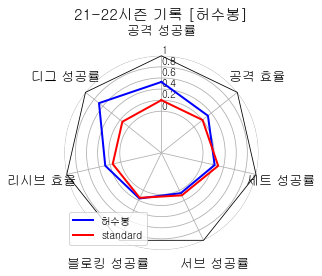

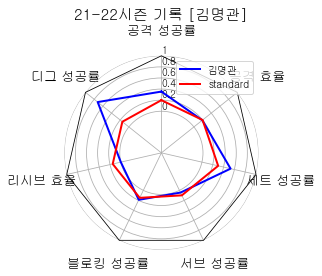

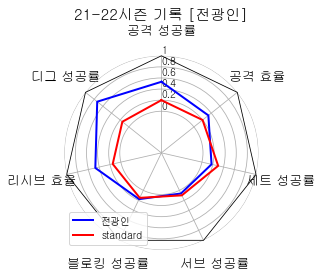

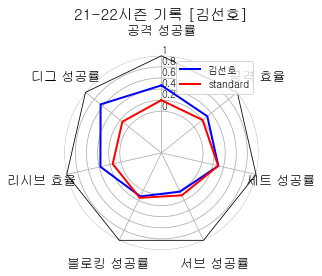

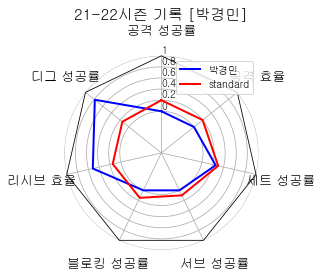

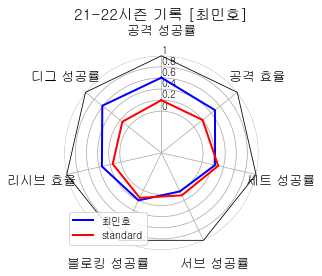

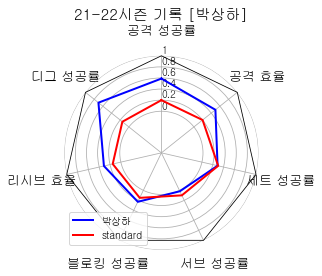

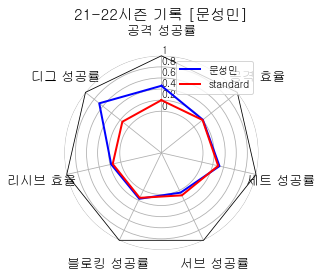

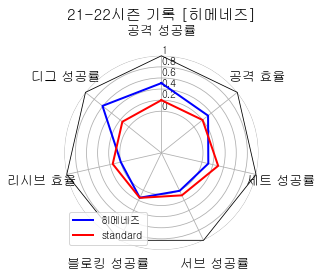

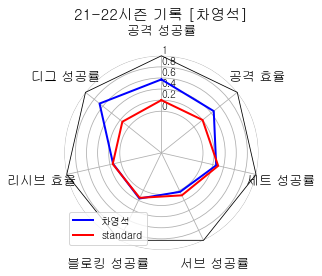

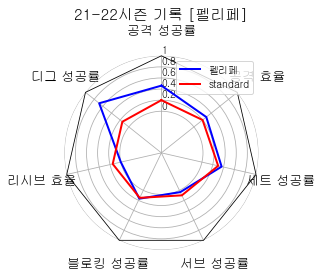

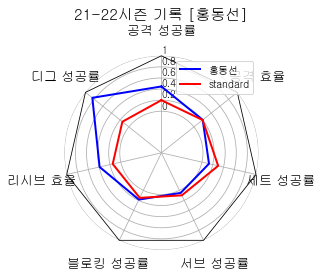

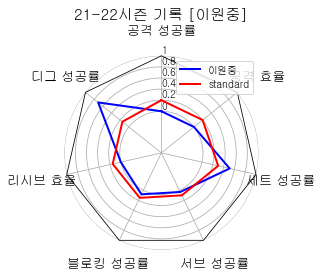

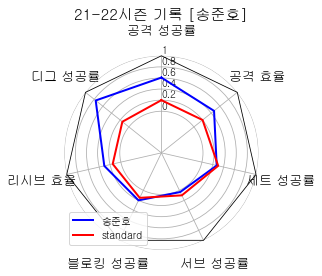

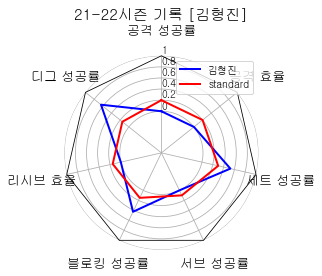

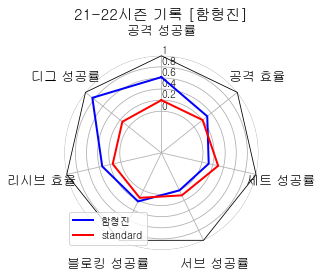

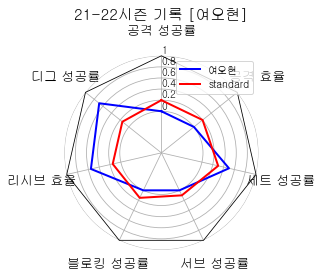

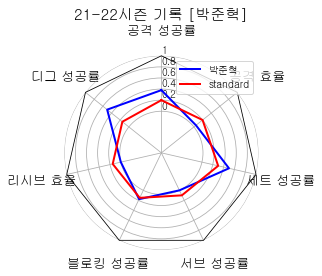

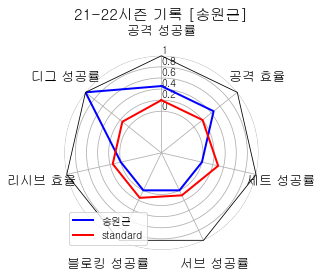

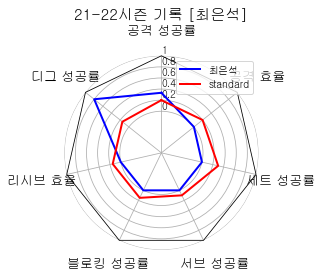

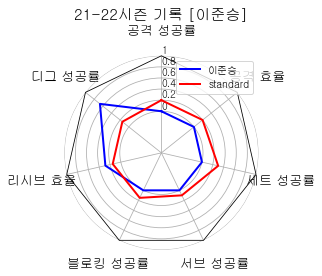

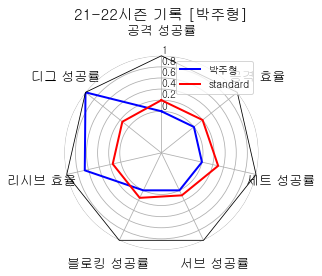

<Figure size 1440x1800 with 0 Axes>

In [169]:
## 따로 그리기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(20,25))
fig.set_facecolor('white')
 
for i, row in df.iterrows():
    data = df.iloc[i].drop('player_name').tolist()
    data += data[:1]
    
    ax = plt.subplot(6,4,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0','0.2','0.4','0.6','0.8','1'], fontsize=10) ## y축 눈금 설정
    plt.ylim(-0.75,1)
    
    ax.plot(angles, data, color="blue", linewidth=2, linestyle='solid') ## 레이더 차트 출력
    #ax.fill(angles, data, color="skyblue", alpha=0.4) ## 도형 안쪽에 색을 채워준다.

    ax.plot(angles, standard, color="red", linewidth=2, linestyle='solid') ## 레이더 차트 출력
    #ax.fill(angles, standard, color="pink", alpha=0.4) ## 도형 안쪽에 색을 채워준다.


    for g in ax.yaxis.get_gridlines(): ## grid line 
        g.get_path()._interpolation_steps = len(labels)
    
    spine = Spine(axes=ax,
            spine_type='circle',
            path=Path.unit_regular_polygon(len(labels)))
    
    ## Axes의 중심과 반지름을 맞춰준다.
    spine.set_transform(Affine2D().scale(.5).translate(.5, .5)+ax.transAxes)
            
    ax.spines = {'polar':spine} ## frame의 모양을 원에서 폴리곤으로 바꿔줘야한다.

    plt.title("21-22시즌 기록"+" ["+df["player_name"][i]+"]",fontsize=15) 
    ax.legend([df["player_name"][i],"standard"],loc = "best")

    fig = plt.figure(figsize=(20,25))
    fig.set_facecolor('white')
  

 
#plt.legend(loc=(0.9,0.9))
plt.show()